## 실습
```
Q1. 와인 데이터를 분류할 수 있는 모델을 만들어보자
- 분류
- 회귀
- 군집
Q2. feature importance를 통해 필요없는 것을 제거하거나 아닌 것을 가중치를 주는 작업
```

패키지

In [31]:
from sklearn.datasets import load_wine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

데이터셋

In [3]:
wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

데이터프레임 생성

In [14]:
wine_df = pd.DataFrame(wine["data"], columns=wine["feature_names"])
wine_df["target"] = wine["target"]
print(wine_df)
print(wine_df.columns)

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

## RandomForest

데이터셋 분할

In [33]:
y = wine["target"]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [34]:
x_train, x_test, y_train, y_test = train_test_split(
    wine_df, y, test_size=0.2, random_state=12345
)

In [35]:
clf = RandomForestClassifier(n_estimators=1000, random_state=12345)
clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=12345)

In [36]:
clf.score(x_train, y_train)

1.0

In [38]:
clf.score(x_test, y_test)

1.0

In [43]:
clf.feature_importances_[:13]

array([0.07605402, 0.01947744, 0.00850308, 0.02895232, 0.01945667,
       0.03631436, 0.12023023, 0.00724193, 0.02036582, 0.10984736,
       0.0500963 , 0.10109343, 0.12287112])

In [42]:
wine["feature_names"]

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

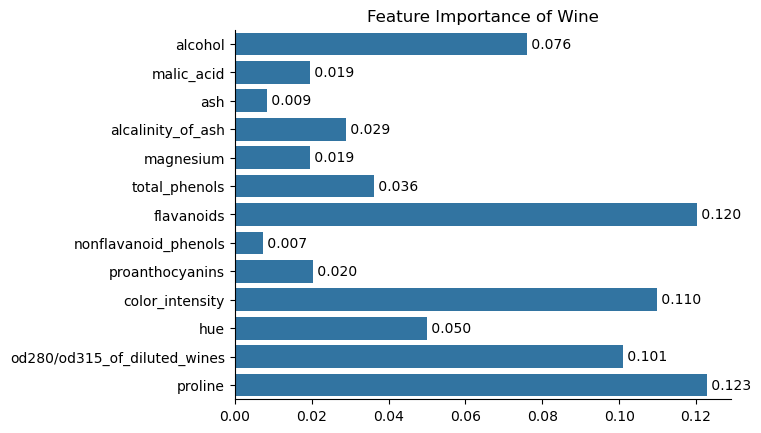

In [44]:
ax = sns.barplot(x=clf.feature_importances_[:13], y=wine["feature_names"])
ax.bar_label(ax.containers[0], fmt=" %.3f")
plt.gca().spines[["right", "top"]].set_visible(False)
plt.title("Feature Importance of Wine")
plt.show()

In [49]:
clf.feature_importances_[:13][clf.feature_importances_[:13] > 0.1]

array([0.12023023, 0.10984736, 0.10109343, 0.12287112])

In [16]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [18]:
wine_scaled = StandardScaler().fit_transform(wine_df.iloc[:, :-1])
wine_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

## PCA

In [23]:
pca = PCA(n_components=2)

In [24]:
pca.fit(wine_scaled)
wine_pca = pca.transform(wine_scaled)
print(wine_pca.shape)

(178, 2)


In [25]:
wine.data.shape

(178, 13)

In [26]:
pca_columns = ["pca_component_1", "pca_component_2"]
wineDF_pca = pd.DataFrame(wine_pca, columns=pca_columns)
wineDF_pca["target"] = wine.target
wineDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0


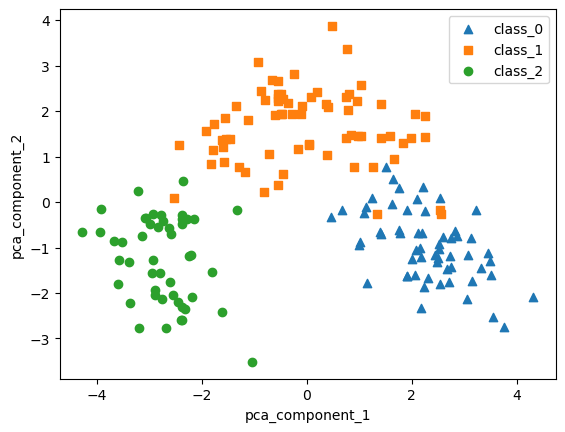

In [27]:
markers = ["^", "s", "o"]

for i, marker in enumerate(markers):
    x_axis_data = wineDF_pca[wineDF_pca["target"] == i]["pca_component_1"]
    y_axis_data = wineDF_pca[wineDF_pca["target"] == i]["pca_component_2"]
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=wine.target_names[i])


plt.legend()
plt.xlabel("pca_component_1")
plt.ylabel("pca_component_2")
plt.show()

In [28]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

## LDA

In [30]:
lda = LinearDiscriminantAnalysis(n_components=2)

lda.fit(wine_scaled, wine)

wine_lda = lda.transform(wine_scaled)

print(wine_lda.shape)

ValueError: y should be a 1d array, got an array of shape () instead.